In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from emissions.trainer import Trainer
from emissions.data import load_data, clean_data
from sklearn.metrics import plot_confusion_matrix

In [3]:
pollution_quantity = {}

# 2020 - Baseline model


In [4]:
from emissions.impsearch import ImpSearch
imp = ImpSearch()
imp.load_data()

----------------start loading data----------------
Data loaded: 187503 records
----------------start cleaning data----------------

Records in input data: 187503

Share of Pass and Fail before cleaning:
Fail: 7%
Pass: 93%

Unique vehicles in Fail: 10813
Unique vehicles in Pass: 84908

Records with missing GVWR: 8125

Records after droping rows where GVWR is < 1000 or missing: 179373

Records after keeping only the earliest test within a month for each vehicle: 165732

Records where AFTER_COVID is True: 21325

Records where ODOMETER = 0: 796

Records after droping rows where ODOMETER is missing: 164855

Records after droping rows where MILE_YEAR > 40,000: 163891

Records in output data:163891

Share of Pass and Fail after cleaning:
Fail: 7%
Pass: 93%

Unique vehicles in Fail: 10194
Unique vehicles in Pass: 78573
['VEHICLE_TYPE' 'MODEL_YEAR' 'VEHICLE_AGE' 'MILE_YEAR' 'GVWR'
 'ENGINE_SIZE' 'TRANS_TYPE' 'TEST_TYPE' 'RESULT' 'MAKE'
 'ENGINE_WEIGHT_RATIO' 'SPORT' 'TEST_SDATE' 'AFTER_COVID']


In [5]:
imp.cols = ['VEHICLE_AGE', 'MILE_YEAR', 'MAKE']
imp.cols

['VEHICLE_AGE', 'MILE_YEAR', 'MAKE']


max_depth: 2
           train    val   test
accuracy   0.472  0.472  0.595
recall     0.645  0.642  0.499
precision  0.097  0.106  0.080

By the time 2020-06-04, 
                    - 575 vehicles were off the road in reality
                    - 682 vehicles could have been off the road using model max_depth = 2

By the time 2020-06-30, 
                    - 687 vehicles were off the road in reality
                    - 789 vehicles could have been off the road using model max_depth = 2

max_depth: 3
           train    val   test
accuracy   0.482  0.488  0.582
recall     0.718  0.702  0.745
precision  0.101  0.101  0.108

By the time 2020-06-16, 
                    - 638 vehicles were off the road in reality
                    - 1019 vehicles could have been off the road using model max_depth = 3

By the time 2020-06-30, 
                    - 687 vehicles were off the road in reality
                    - 1049 vehicles could have been off the road using model max_depth = 3

m

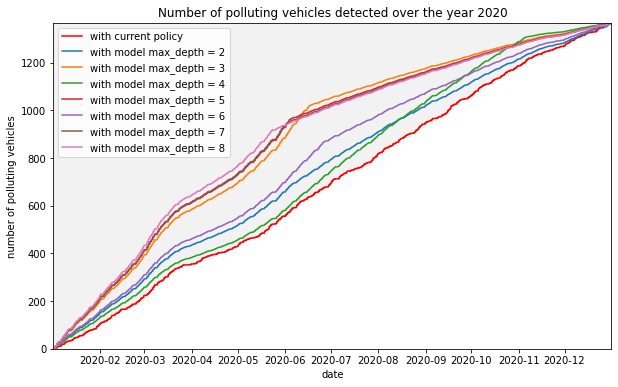

8     9979109.0
5    10068505.0
7    10107485.5
3    10118465.5
6    12228300.0
2    13002953.0
4    13272077.0
dtype: float64

Saved implementation_analysis_2020_best_depth_8.csv in data folder


In [7]:
imp.implement(2020, max_depth=np.arange(2, 9))

In [10]:
pollution_quantity['2020_baseline'] = [8, 9979109.0]

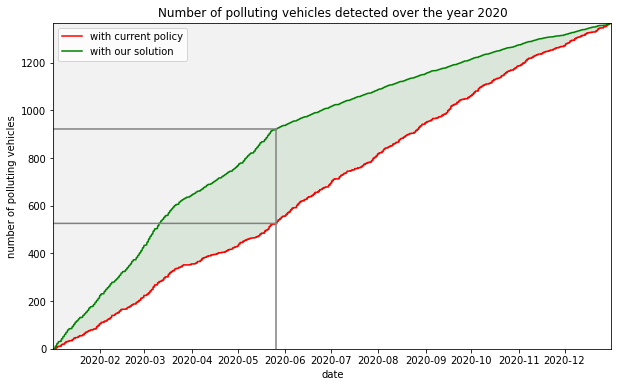

In [9]:
imp.plot_clean()

# 2020 - Decision Tree


In [43]:
imp.cols = ['VEHICLE_AGE', 'MILE_YEAR', 'MAKE', 'MODEL_YEAR', 'ENGINE_WEIGHT_RATIO']


max_depth: 5
           train    val   test
accuracy   0.599  0.574  0.596
recall     0.726  0.752  0.577
precision  0.121  0.118  0.091

By the time 2020-06-06, 
                    - 590 vehicles were off the road in reality
                    - 789 vehicles could have been off the road using model max_depth = 5

By the time 2020-06-30, 
                    - 687 vehicles were off the road in reality
                    - 871 vehicles could have been off the road using model max_depth = 5

max_depth: 6
           train    val   test
accuracy   0.610  0.596  0.636
recall     0.736  0.743  0.660
precision  0.124  0.122  0.112

By the time 2020-05-29, 
                    - 551 vehicles were off the road in reality
                    - 903 vehicles could have been off the road using model max_depth = 6

By the time 2020-06-30, 
                    - 687 vehicles were off the road in reality
                    - 988 vehicles could have been off the road using model max_depth = 6

max

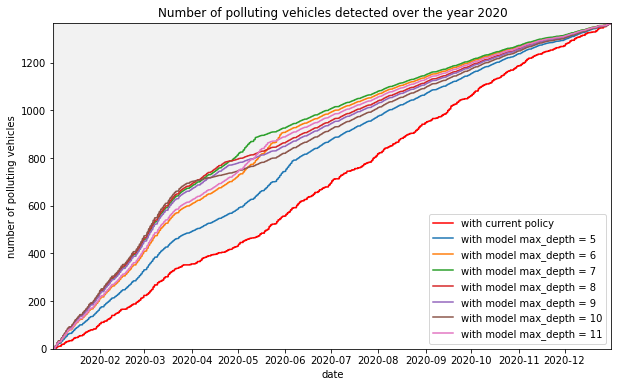

7      9868283.0
8     10334263.5
6     10391095.5
11    10428923.5
9     10537860.5
10    10692410.0
5     12016906.5
dtype: float64

Saved implementation_analysis_2020_best_depth_7.csv in data folder


In [4]:
imp.implement(2020, max_depth=np.arange(5, 12))

In [11]:
pollution_quantity['2020_DT'] = [7, 9868283]

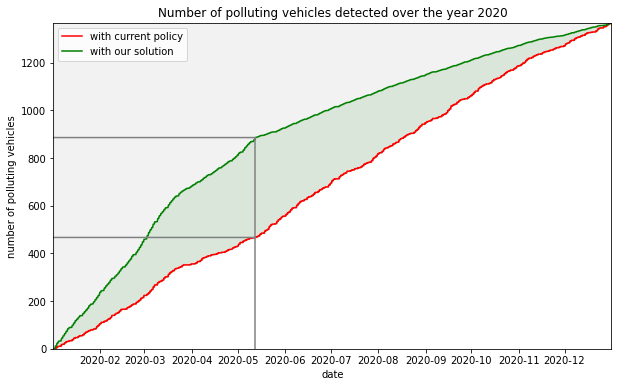

In [5]:
imp.plot_clean()

# 2020 - Random Forest



max_depth: 6
           train    val   test
accuracy   0.625  0.622  0.733
recall     0.747  0.740  0.578
precision  0.130  0.130  0.136

By the time 2020-04-13, 
                    - 393 vehicles were off the road in reality
                    - 791 vehicles could have been off the road using model max_depth = 6

By the time 2020-06-30, 
                    - 687 vehicles were off the road in reality
                    - 967 vehicles could have been off the road using model max_depth = 6

max_depth: 7
           train    val   test
accuracy   0.634  0.633  0.737
recall     0.747  0.731  0.574
precision  0.133  0.132  0.137

By the time 2020-04-09, 
                    - 383 vehicles were off the road in reality
                    - 785 vehicles could have been off the road using model max_depth = 7

By the time 2020-06-30, 
                    - 687 vehicles were off the road in reality
                    - 965 vehicles could have been off the road using model max_depth = 7

max

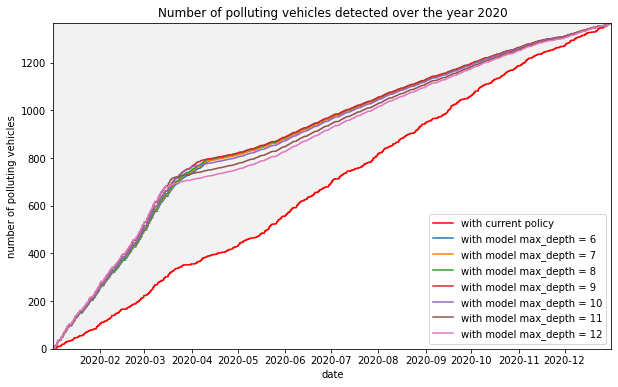

9      9897190.5
8      9951000.5
7     10021904.5
6     10028063.5
10    10047886.0
11    10221369.0
12    10425865.5
dtype: float64

Saved implementation_analysis_2020_best_depth_9.csv in data folder
CPU times: user 5min 39s, sys: 437 ms, total: 5min 40s
Wall time: 23min 17s


In [8]:
%%time
imp.implement(2020, n_estimators=[100], max_depth=np.arange(6, 13, 1))

In [12]:
pollution_quantity['2020_RF'] = [9, 9897190.5]

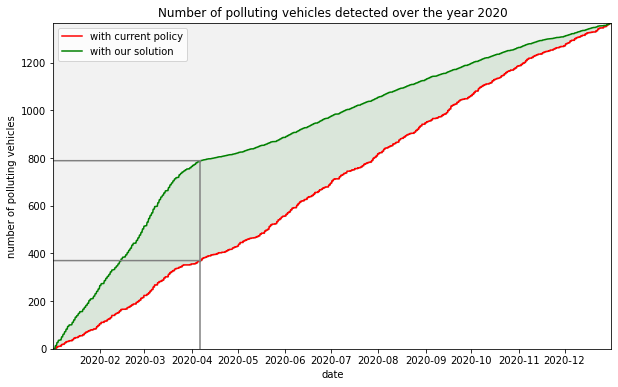

In [9]:
imp.plot_clean()


max_depth: 7
           train    val   test
accuracy   0.634  0.634  0.727
recall     0.748  0.731  0.594
precision  0.133  0.132  0.136

By the time 2020-04-17, 
                    - 400 vehicles were off the road in reality
                    - 813 vehicles could have been off the road using model max_depth = 7

By the time 2020-06-30, 
                    - 687 vehicles were off the road in reality
                    - 978 vehicles could have been off the road using model max_depth = 7

max_depth: 8
           train    val   test
accuracy   0.645  0.645  0.731
recall     0.748  0.724  0.595
precision  0.136  0.135  0.138

By the time 2020-04-15, 
                    - 396 vehicles were off the road in reality
                    - 814 vehicles could have been off the road using model max_depth = 8

By the time 2020-06-30, 
                    - 687 vehicles were off the road in reality
                    - 980 vehicles could have been off the road using model max_depth = 8

max

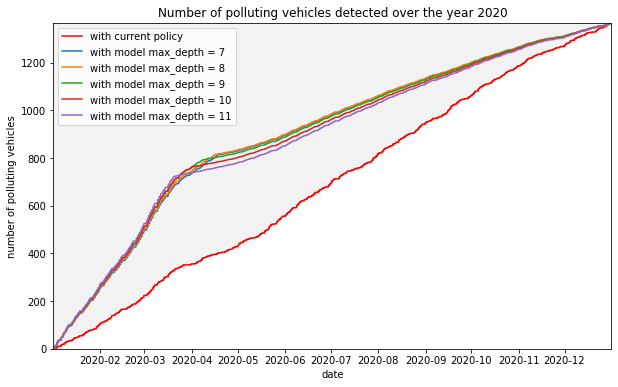

8      9848411.0
9      9900155.5
7      9908146.5
10    10059969.0
11    10202449.0
dtype: float64

Saved implementation_analysis_2020_best_depth_8.csv in data folder
CPU times: user 7min 45s, sys: 508 ms, total: 7min 46s
Wall time: 30min 33s


In [14]:
%%time
imp.implement(2020, n_estimators=[200], max_depth=np.arange(7, 12, 1))

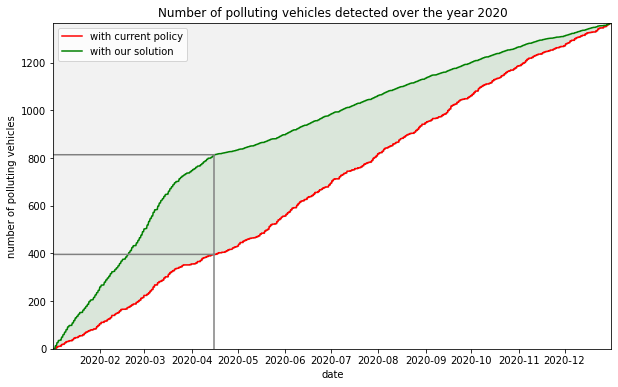

In [15]:
imp.plot_clean()

# 2019 - Decision Tree



max_depth: 5
           train    val   test
accuracy   0.598  0.577  0.570
recall     0.734  0.758  0.756
precision  0.122  0.119  0.111

By the time 2019-06-10, 
                    - 734 vehicles were off the road in reality
                    - 1158 vehicles could have been off the road using model max_depth = 5

By the time 2019-07-01, 
                    - 833 vehicles were off the road in reality
                    - 1201 vehicles could have been off the road using model max_depth = 5

max_depth: 6
           train    val   test
accuracy   0.626  0.634  0.577
recall     0.717  0.702  0.749
precision  0.128  0.128  0.112

By the time 2019-06-06, 
                    - 715 vehicles were off the road in reality
                    - 1146 vehicles could have been off the road using model max_depth = 6

By the time 2019-07-01, 
                    - 833 vehicles were off the road in reality
                    - 1195 vehicles could have been off the road using model max_depth = 6


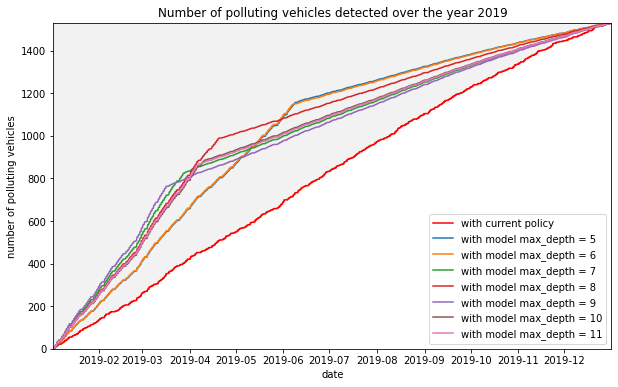

8     11601390.0
5     12178294.0
6     12186770.5
7     12291110.0
10    12338541.5
11    12366684.5
9     12428164.0
dtype: float64

Saved implementation_analysis_2019_best_depth_8.csv in data folder


In [6]:
imp.implement(2019, max_depth=np.arange(5, 12))

In [13]:
pollution_quantity['2019_DT'] = [8, 11601390]

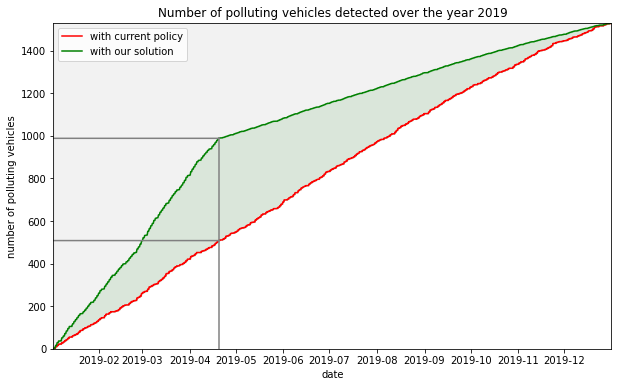

In [7]:
imp.plot_clean()

# Summary

In [14]:
t = pd.read_csv('../data/implementation_analysis_2020_best_depth_7.csv').sort_values('TEST_SDATE')
t.set_index('TEST_SDATE', inplace=True)
t['n_fails_left'] = t.n_fails.max() - t.n_fails
pollution_quantity['current_policy'] = ['-', t.n_fails_left.sum()]

In [15]:
tmp = pd.DataFrame.from_dict(pollution_quantity, orient='index')
tmp.columns = ['max_depth', 'pollution_quantity']
tmp['pollution_reduction'] = tmp.loc['current_policy', 'pollution_quantity'] - tmp.pollution_quantity
tmp.sort_values('pollution_reduction', ascending=False)

,max_depth,pollution_quantity,pollution_reduction
2020_DT,7,9868283.0,4494161.0
2020_RF,9,9897190.5,4465253.5
2020_baseline,8,9979109.0,4383335.0
2019_DT,8,11601390.0,2761054.0
current_policy,-,14362444.0,0.0


# 2020 - ExplainerDashboard - Decision Tree



In [16]:
# train test  
cols = imp.cols
X_train = imp.X_train
X_test = imp.X_test
y_train = imp.y_train
y_test = imp.y_test

In [17]:
from sklearn.ensemble import RandomForestClassifier
from emissions.transformer import MakeTransformer
from sklearn.preprocessing import OneHotEncoder
from explainerdashboard import ExplainerDashboard, ClassifierExplainer

In [18]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [22]:
# transform make
mt = MakeTransformer()
mt.fit(X_train[cols])
X_train_t = mt.transform(X_train[cols])
# encode make
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X_train_t[['MAKE']])

# form train df
df1 = X_train_t[['VEHICLE_AGE', 'MILE_YEAR', 'MODEL_YEAR', 'ENGINE_WEIGHT_RATIO']]
df2 = pd.DataFrame(enc.transform(X_train_t[['MAKE']]).toarray(), columns=enc.get_feature_names())
X_train_df = pd.concat([df1,df2], axis=1)

# form test df
X_test_t = mt.transform(X_test[cols])
f1 = X_test_t[['VEHICLE_AGE', 'MILE_YEAR', 'MODEL_YEAR', 'ENGINE_WEIGHT_RATIO']]
df2 = pd.DataFrame(enc.transform(X_test_t[['MAKE']]).toarray(), columns=enc.get_feature_names())
X_test_df = pd.concat([df1,df2], axis=1)

X_test_df.head()

,VEHICLE_AGE,MILE_YEAR,MODEL_YEAR,ENGINE_WEIGHT_RATIO,x0_acura,x0_bmw,x0_buick,x0_chevrolet,x0_chrysler,x0_dodge,...,x0_kia,x0_lexus,x0_mazda,x0_mitsubishi,x0_nissan,x0_other,x0_pontiac,x0_subaru,x0_toyota,x0_volkswagen
0,4,3637.25,2011,0.55,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13,12142.85,2002,0.64,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,14,12862.07,2001,0.59,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,19,7041.84,1996,0.83,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,7,16336.71,2008,0.58,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# model
forest = RandomForestClassifier(n_estimators=1,
                                max_depth=7,
                                class_weight='balanced')

forest.fit(X_train_df, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, n_estimators=1)

In [25]:
%%time
explainer = ClassifierExplainer(forest, 
                                X_test_df, 
                                y_test,
                                target='RESULT',
                                labels=['PASS', 'FAIL']
                               )

Detected RandomForestClassifier model: Changing class type to RandomForestClassifierExplainer...
Note: model_output=='probability', so assuming that raw shap output of RandomForestClassifier is in probability space...
Generating self.shap_explainer = shap.TreeExplainer(model)
CPU times: user 150 ms, sys: 30.1 ms, total: 180 ms
Wall time: 176 ms


In [28]:
explainer.dump("explainer_DT.joblib")

Calculating prediction probabilities...
Calculating prediction probabilities...
Calculating prediction probabilities...
Calculating prediction probabilities...Calculating prediction probabilities...

Calculating prediction probabilities...


In [27]:
db = ExplainerDashboard(explainer,
                           classifier_custom_component='precision_graph',
                           shap_interaction=False, 
                           mode='external')
db.run(port=8050)

Building ExplainerDashboard..
Generating layout...
Calculating shap values...
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating roc auc curves...
Calculating prediction probabilities...
Calculating confusion matrices...
Calculating prediction probabilities...
Calculating prediction probabilities...
Calculating pred_percentiles...
Calculating prediction probabilities...
Calculating predictions...
Calculating prediction probabilities...
Calculating pr auc curves...
Calculating prediction probabilities...
Calculating liftcurve_dfs...
Calculating prediction probabilities...
Calculating prediction probabilities...
Calculating prediction probabilities...
Calculating prediction probabilities...
Calculating predictions...
Calculating ShadowDecTree for each individual decision tree...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. Classifie

In [30]:
# store both the explainer and the dashboard configuration:
db.to_yaml("dashboard_DT.yaml", explainerfile="explainer_DT.joblib", dump_explainer=True)

Dumping configuration .yaml to /home/guli/code/Guli-Y/DataScienceLab/wimlds_emissions/notebooks/dashboard_DT.yaml...
Dumping explainer to /home/guli/code/Guli-Y/DataScienceLab/wimlds_emissions/notebooks/explainer_DT.joblib...
